In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (RandomForestClassifier,
                              AdaBoostClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

In [2]:
Data=pd.read_csv("project_dataset_1.csv")


# Data Visualization

In [3]:
Data2=Data.iloc[:,2:] #Removing the first 2 columns from the data set as it were just the name and serial numbers of the files.


In [4]:
Data2=Data2.sample(frac=1) #Shuffling the dataset


# Train-Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(Data2.iloc[:,:12], Data2.iloc[:,12:], test_size=0.3, random_state=42)

In [6]:
y_train=y_train.values.ravel()
y_train.shape

(29030,)

# Plotting the features

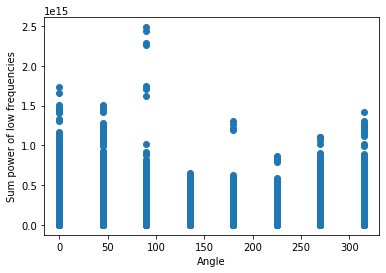

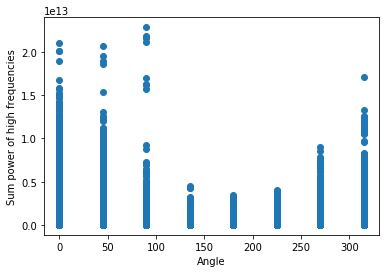

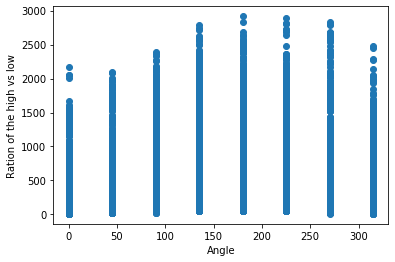

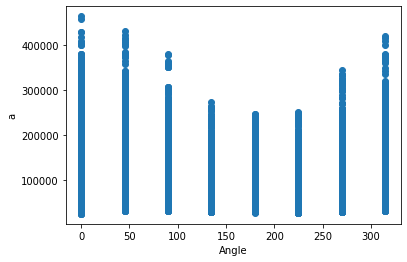

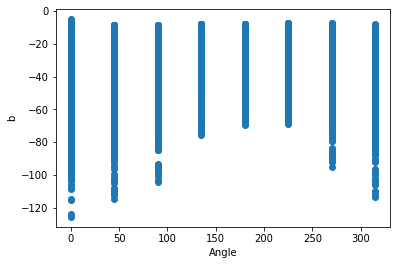

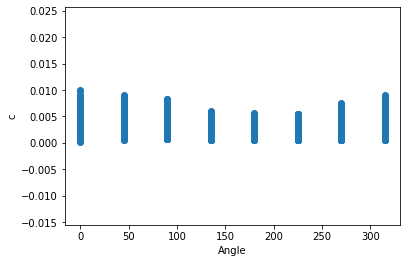

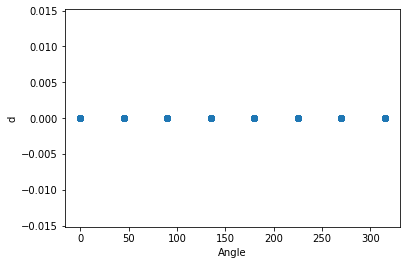

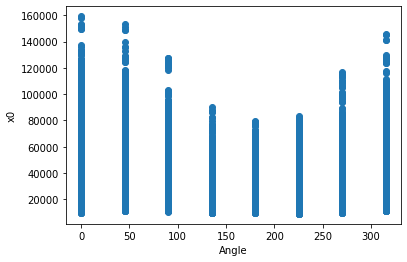

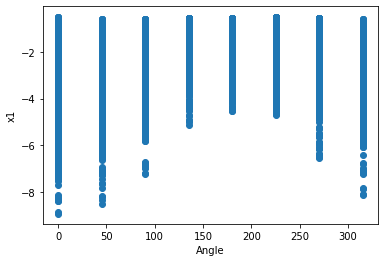

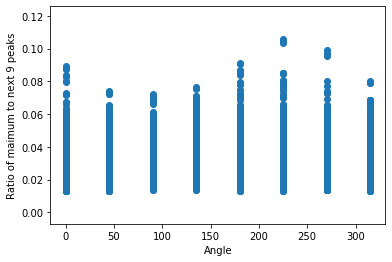

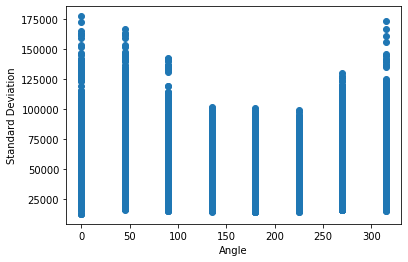

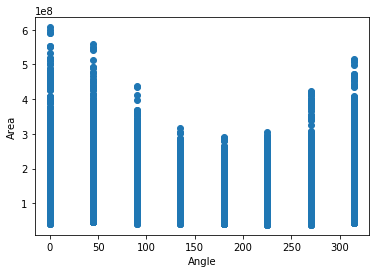

In [7]:
FeaturesLabel={0:"Sum power of low frequencies",1:"Sum power of high frequencies",2:"Ration of the high vs low",
               3:"a",4:"b",5:"c",6:"d",7:"x0",8:"x1",9:"Ratio of maimum to next 9 peaks",10:"Standard Deviation",
              11:"Area"}
for i in range(12):
    plt.figure()
    plt.scatter(Data2.iloc[:,12:],Data2.iloc[:,i:i+1])
    plt.xlabel("Angle")
    plt.ylabel(FeaturesLabel[i])
    plt.savefig(fname=FeaturesLabel[i]+'vs'+"Angle")

# K-Fold Validation and Model Fitting

In [ ]:
kf = KFold(n_splits=5)
L=[]
print(kf)
for train_index, test_index in kf.split(Data2):
 #   print(train_index,test_index)
    X_train, X_test = Data2.iloc[train_index,:12], Data2.iloc[test_index,:12]
    y_train, y_test = Data2.iloc[train_index,12:], Data2.iloc[test_index,12:]
    L_temp={}
    for k in range(10,510,50):
        models = [
          RandomForestClassifier(n_estimators=k),
          ExtraTreesClassifier(n_estimators=k),
          AdaBoostClassifier(DecisionTreeClassifier(max_depth=None),
                             n_estimators=k)]
        for model in models:
            model.fit(X_train,y_train)
            scores=model.score(X_test,y_test)
            if model not in L_temp:
                L_temp[model]=[scores]
            else:
                L_temp[model].append(scores)
    L.append(L_temp)
print(L)
            

KFold(n_splits=5, random_state=None, shuffle=False)


C:\Users\aliba\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
C:\Users\aliba\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
C:\Users\aliba\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\aliba\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.l

C:\Users\aliba\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\aliba\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
C:\Users\aliba\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
C:\Users\aliba\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

In [ ]:
clf = ExtraTreesClassifier(n_estimators=200, random_state=0)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
clf.score(X_test,y_test)

In [ ]:
clf.score(X_train,y_train)

In [ ]:
model1=RandomForestClassifier(n_estimators=100,random_state=0)

In [ ]:
model1.fit(X_train,y_train)

In [ ]:
model1.score(X_test,y_test)

In [ ]:
model2=AdaBoostClassifier(n_estimators=100,random_state=0)

In [ ]:
model2.fit(X_train,y_train)

In [ ]:
model2.score(X_test,y_test)